<a href="https://colab.research.google.com/github/2203A52112/DAUP_LAB_2025/blob/main/2203A52112_DAUP_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


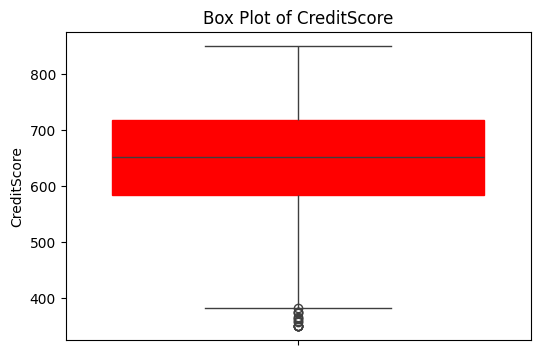

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


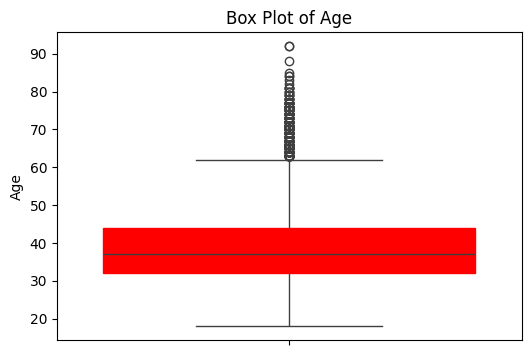

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


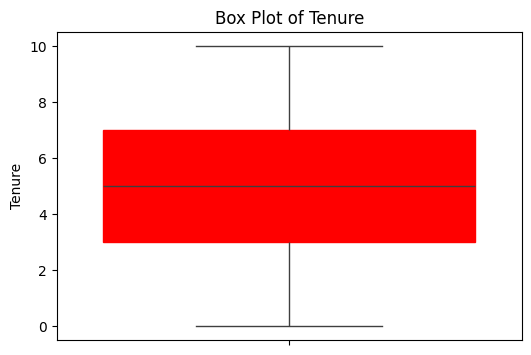

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


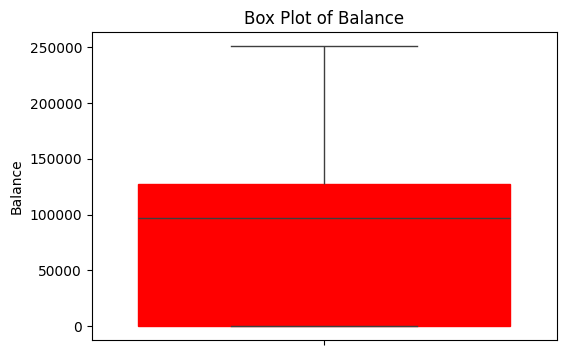

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


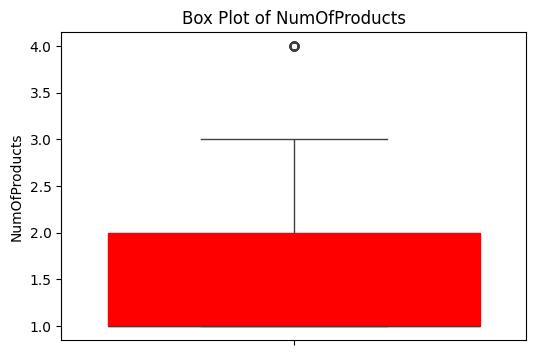

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


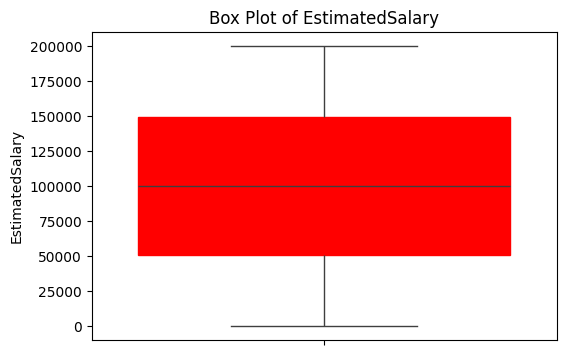

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


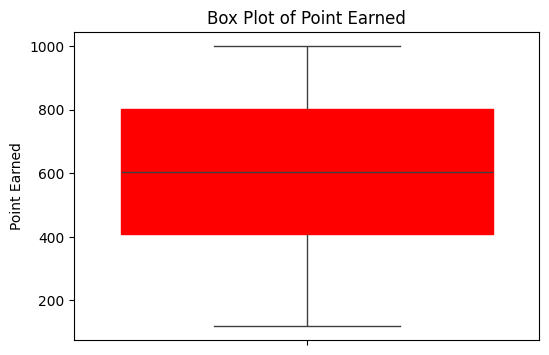


Outlier Summary:
CreditScore: 15 outliers (0.15%)
Age: 359 outliers (3.59%)
Tenure: 0 outliers (0.00%)
Balance: 0 outliers (0.00%)
NumOfProducts: 60 outliers (0.60%)
EstimatedSalary: 0 outliers (0.00%)
Point Earned: 0 outliers (0.00%)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Selecting numerical columns
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]

# Identify outliers using the IQR method
outliers_count = {}
total_rows = len(df)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers_count[col] = len(outlier_values)

    # Plot box plot with outliers highlighted
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], boxprops=dict(color="red"))
    plt.title(f'Box Plot of {col}')
    plt.show()

# Display summary of outliers
print("\nOutlier Summary:")
for col, count in outliers_count.items():
    percentage = (count / total_rows) * 100
    print(f"{col}: {count} outliers ({percentage:.2f}%)")


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Selecting features and target variable
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]
target = "Exited"  # Assuming "Exited" is the target column (1 = Churn, 0 = Retain)

# Prepare the data
X = df[numerical_cols]
y = df[target]

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print accuracies before outlier removal
print(f"Accuracy Before Removing Outliers:")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


<ipython-input-8-4915ab6ba82d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Accuracy Before Removing Outliers:
SVM Accuracy: 0.80
Random Forest Accuracy: 0.84


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Selecting features and target variable
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]
target = "Exited"  # Assuming "Exited" is the target column (1 = Churn, 0 = Retain)

# Detect and remove outliers using IQR method
def remove_outliers(df, numerical_cols):
    cleaned_df = df.copy()
    for col in numerical_cols:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers
df_cleaned = remove_outliers(df, numerical_cols)

# Prepare the cleaned data
X_cleaned = df_cleaned[numerical_cols]
y_cleaned = df_cleaned[target]

# Handle missing values if any
X_cleaned.fillna(X_cleaned.mean(), inplace=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize numerical features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy_cleaned = accuracy_score(y_test, y_pred_svm)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy_cleaned = accuracy_score(y_test, y_pred_rf)

# Print accuracies after outlier removal
print(f"Accuracy After Removing Outliers:")
print(f"SVM Accuracy: {svm_accuracy_cleaned:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy_cleaned:.2f}")


<ipython-input-9-3a3ac06259d5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned.fillna(X_cleaned.mean(), inplace=True)


Accuracy After Removing Outliers:
SVM Accuracy: 0.80
Random Forest Accuracy: 0.84


With outliers:
Mean: 0.18427962673250972, Standard Deviation: 2.3586357530097883

Without outliers:
Mean: 0.059808015534485, Standard Deviation: 1.0129597692685017


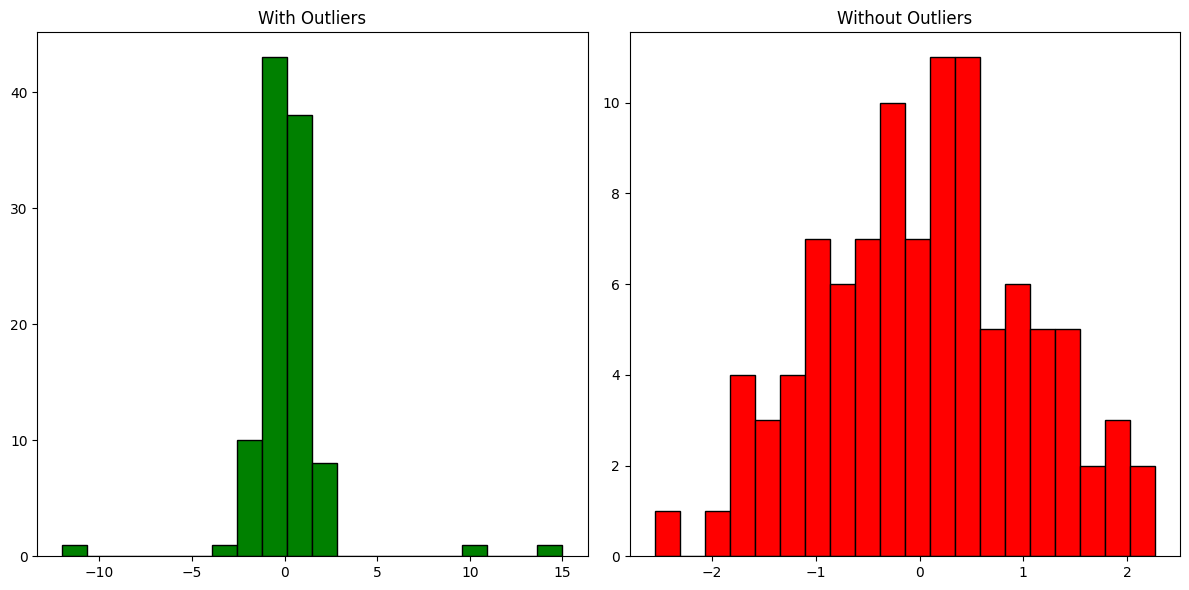

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Sample dataset (you can replace this with your own data)
np.random.seed(0)
data_with_outliers = np.random.normal(0, 1, 100)  # Normal distribution
data_with_outliers = np.append(data_with_outliers, [10, 15, -12])  # Adding outliers

# Create a pandas DataFrame
df = pd.DataFrame(data_with_outliers, columns=['value'])

# Calculate Z-scores to detect outliers (Z > 3 or Z < -3 are outliers)
df['zscore'] = zscore(df['value'])

# Identifying outliers (Z-scores above 3 or below -3)
outliers = df[np.abs(df['zscore']) > 3]

# Removing outliers
df_no_outliers = df[np.abs(df['zscore']) <= 3]

# Analysis with outliers
mean_with_outliers = df['value'].mean()
std_with_outliers = df['value'].std()

# Analysis without outliers
mean_without_outliers = df_no_outliers['value'].mean()
std_without_outliers = df_no_outliers['value'].std()

# Print the results
print("With outliers:")
print(f"Mean: {mean_with_outliers}, Standard Deviation: {std_with_outliers}")
print("\nWithout outliers:")
print(f"Mean: {mean_without_outliers}, Standard Deviation: {std_without_outliers}")

# Visualization
plt.figure(figsize=(12, 6))

# Histogram with outliers
plt.subplot(1, 2, 1)
plt.hist(df['value'], bins=20, color='green', edgecolor='black')
plt.title("With Outliers")

# Histogram without outliers
plt.subplot(1, 2, 2)
plt.hist(df_no_outliers['value'], bins=20, color='red', edgecolor='black')
plt.title("Without Outliers")

plt.tight_layout()
plt.show()
